In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
filepath = r"C:\Users\Neha Sadh\Desktop\github\Data-Collisions\Collisions.csv" 
df_whole = pd.read_csv(filepath)

In [21]:
df_whole.shape

(221266, 40)

In [22]:
df_whole.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [23]:
df = df_whole[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING', 'HITPARKEDCAR']]

df_map = df_whole[['SEVERITYCODE','ADDRTYPE','X', 'Y']]

In [24]:
df.shape

(221266, 13)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 13 columns):
SEVERITYCODE      221265 non-null object
SEVERITYDESC      221266 non-null object
ADDRTYPE          217554 non-null object
INCDATE           221266 non-null object
INCDTTM           221266 non-null object
JUNCTIONTYPE      209299 non-null object
INATTENTIONIND    30188 non-null object
UNDERINFL         194787 non-null object
WEATHER           194578 non-null object
ROADCOND          194658 non-null object
LIGHTCOND         194490 non-null object
SPEEDING          9913 non-null object
HITPARKEDCAR      221266 non-null object
dtypes: object(13)
memory usage: 21.9+ MB


### identify and handling misiing values

#### identify missing data

##### Convert "?" to NaN In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience.

In [26]:
df.replace("?", np.nan, inplace = True)

In [27]:
df.isnull().head(6)

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,True,True,True,True,True,True,False
5,False,False,False,False,False,False,True,True,True,True,True,True,False


In [28]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----------------------------------")

SEVERITYCODE
False    221265
True          1
Name: SEVERITYCODE, dtype: int64
-----------------------------------
SEVERITYDESC
False    221266
Name: SEVERITYDESC, dtype: int64
-----------------------------------
ADDRTYPE
False    217554
True       3712
Name: ADDRTYPE, dtype: int64
-----------------------------------
INCDATE
False    221266
Name: INCDATE, dtype: int64
-----------------------------------
INCDTTM
False    221266
Name: INCDTTM, dtype: int64
-----------------------------------
JUNCTIONTYPE
False    209299
True      11967
Name: JUNCTIONTYPE, dtype: int64
-----------------------------------
INATTENTIONIND
True     191078
False     30188
Name: INATTENTIONIND, dtype: int64
-----------------------------------
UNDERINFL
False    194787
True      26479
Name: UNDERINFL, dtype: int64
-----------------------------------
WEATHER
False    194578
True      26688
Name: WEATHER, dtype: int64
-----------------------------------
ROADCOND
False    194658
True      26608
Name: ROADCOND, dtype

##### Replace missing value by the most frequency:

In [29]:
df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df['ADDRTYPE'].value_counts()

Block           148569
Intersection     71823
Alley              874
Name: ADDRTYPE, dtype: int64

In [30]:
df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 'At-Intersection', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", 'At-Intersection', inplace=True)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    113567
At-Intersection                             71612
Mid-Block (but intersection related)        24402
RampDriveway                                11685
Name: JUNCTIONTYPE, dtype: int64

In [31]:
df["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
"""
df["UNDERINFL"].replace("0", "N", inplace=True)
df["UNDERINFL"].replace("1", "Y", inplace=True)
"""
df['UNDERINFL'].value_counts()

0    211637
1      9629
Name: UNDERINFL, dtype: int64

In [32]:
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace("Other","Unknown",inplace=True)
df["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df["WEATHER"].replace("Raining","RainSnow",inplace=True)
df["WEATHER"].replace("Snowing","RainSnow",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain","RainSnow",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke","RainSnow",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt","RainSnow",inplace=True)
df["WEATHER"].replace("Severe Crosswind","RainSnow",inplace=True)
df['WEATHER'].value_counts()

Clear           141049
RainSnow         35715
Overcast         28517
Unknown          15984
Blowing Snow         1
Name: WEATHER, dtype: int64

In [33]:
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df['ROADCOND'].value_counts()

Dry                154779
Wet                 48715
Unknown             15267
IceOilWaterSnow      2505
Name: ROADCOND, dtype: int64

In [34]:
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df['LIGHTCOND'].value_counts()

Daylight           145942
Dark-With-Light     50053
Unknown             13767
DuskDawn             8675
Dark-No-Light        2829
Name: LIGHTCOND, dtype: int64

In [35]:
df["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df["INATTENTIONIND"].describe()

count     221266
unique         2
top            N
freq      191078
Name: INATTENTIONIND, dtype: object

In [36]:
df["SPEEDING"].replace(np.nan, "N", inplace=True)
df["SPEEDING"].describe()

count     221266
unique         2
top            N
freq      211353
Name: SPEEDING, dtype: object

In [37]:
df["SEVERITYDESC"].describe()

count                             221266
unique                                 5
top       Property Damage Only Collision
freq                              137485
Name: SEVERITYDESC, dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 13 columns):
SEVERITYCODE      221265 non-null object
SEVERITYDESC      221266 non-null object
ADDRTYPE          221266 non-null object
INCDATE           221266 non-null object
INCDTTM           221266 non-null object
JUNCTIONTYPE      221266 non-null object
INATTENTIONIND    221266 non-null object
UNDERINFL         221266 non-null int64
WEATHER           221266 non-null object
ROADCOND          221266 non-null object
LIGHTCOND         221266 non-null object
SPEEDING          221266 non-null object
HITPARKEDCAR      221266 non-null object
dtypes: int64(1), object(12)
memory usage: 21.9+ MB


##### Replace missing value by mean:

In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

##### Drop the whole row:

In [40]:
df_map.dropna(subset=["X"], axis=0, inplace=True)
df_map.shape

(213797, 4)

#### Correct data format

##### Convert data types to proper format

In [41]:
df.dtypes

SEVERITYCODE      object
SEVERITYDESC      object
ADDRTYPE          object
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
INATTENTIONIND    object
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
HITPARKEDCAR      object
dtype: object

In [42]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [43]:
df.dtypes

SEVERITYCODE                   object
SEVERITYDESC                   object
ADDRTYPE                       object
INCDATE           datetime64[ns, UTC]
INCDTTM                datetime64[ns]
JUNCTIONTYPE                   object
INATTENTIONIND                 object
UNDERINFL                       int64
WEATHER                        object
ROADCOND                       object
LIGHTCOND                      object
SPEEDING                       object
HITPARKEDCAR                   object
dtype: object

In [44]:
df['hourofday'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df.head(5)

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,hourofday,dayofweek
0,2,Injury Collision,Intersection,2019-11-20 00:00:00+00:00,2019-11-20 10:25:00,At-Intersection,N,0,Clear,Dry,Daylight,N,N,10,2
1,2,Injury Collision,Intersection,2019-11-18 00:00:00+00:00,2019-11-18 17:01:00,At-Intersection,N,0,RainSnow,Wet,Dark-With-Light,N,N,17,0
2,1,Property Damage Only Collision,Block,2020-02-20 00:00:00+00:00,2020-02-20 08:42:00,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,N,N,8,3
3,1,Property Damage Only Collision,Intersection,2004-06-08 00:00:00+00:00,2004-06-08 00:00:00,At-Intersection,N,0,RainSnow,Wet,Dark-With-Light,N,N,0,1
4,0,Unknown,Block,2004-10-15 00:00:00+00:00,2004-10-15 00:00:00,Mid-Block (but intersection related),N,0,Clear,Dry,Daylight,N,N,0,4


In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

##### data_standardization

In [ ]:
df['highway-mpg'] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

##### Data Normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [ ]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

##### Binning

transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

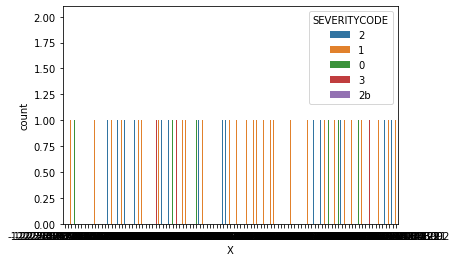

In [48]:
sns.countplot(x ="X", data= df_map.head(100), hue="SEVERITYCODE")

In [49]:
bins = np.linspace(min(df_map["X"]), max(df_map["X"]), 4)
group_names = ['Low', 'Medium', 'High']
df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )
df_map[['X','X-binned']].head(10)

,X,X-binned
0,-122.386772,Low
1,-122.341806,Medium
2,-122.374899,Low
3,-122.300758,Medium
4,-122.313053,Medium
5,-122.364664,Low
6,-122.323569,Medium
7,-122.330904,Medium
8,-122.328878,Medium
9,-122.327525,Medium


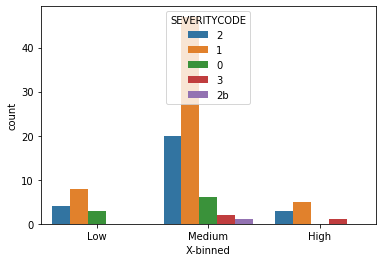

In [50]:
sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE")

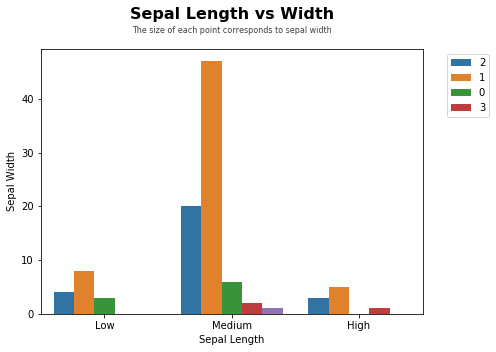

In [51]:
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE", ax=ax)

# make adjustments
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

fig.tight_layout()
plt.show()

##### Indicator variable (or dummy variable)

In [52]:
dummy_variable_1 = pd.get_dummies(df_map["ADDRTYPE"])
dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
dummy_variable_1.head()

,AddType-Block,AddType-Intersection
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [53]:
df_map = pd.concat([df_map, dummy_variable_1], axis=1)
df_map.head(5)

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,AddType-Block,AddType-Intersection
0,2,Intersection,-122.386772,47.564720,Low,0,1
1,2,Intersection,-122.341806,47.686934,Medium,0,1
2,1,Block,-122.374899,47.668666,Low,1,0
3,1,Intersection,-122.300758,47.683047,Medium,0,1
4,0,Block,-122.313053,47.567241,Medium,1,0


#### Analyzing Individual Feature Patterns using Visualization

In [54]:
df.describe()

,UNDERINFL,hourofday,dayofweek
count,221266.000000,221266.000000,221266.00000
mean,0.043518,10.096508,2.92998
std,0.204020,7.491989,1.92098
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,1.00000
50%,0.000000,11.000000,3.00000
75%,0.000000,16.000000,5.00000
max,1.000000,23.000000,6.00000


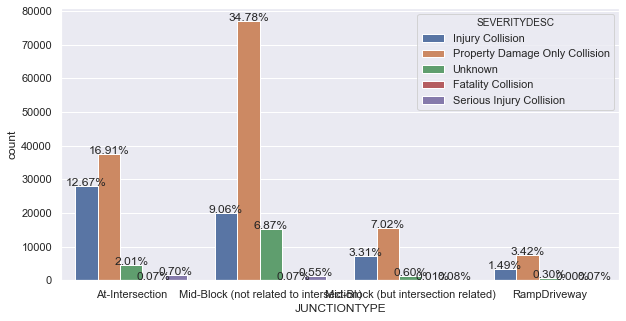

In [55]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


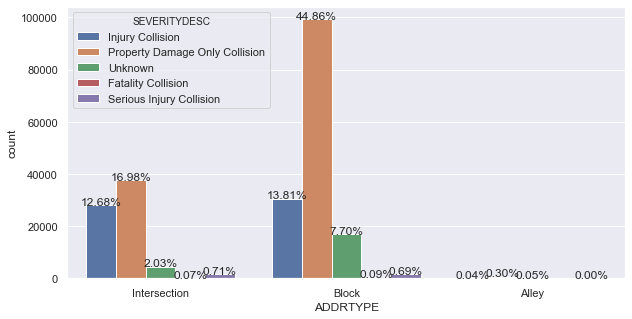

In [56]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

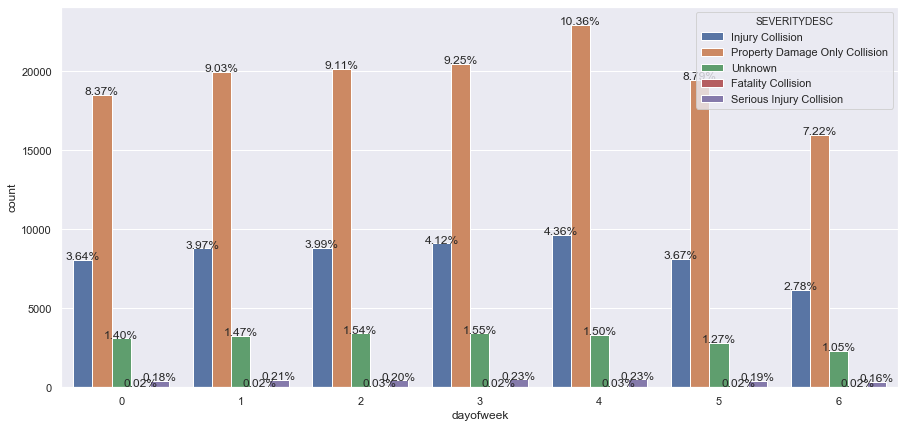

In [57]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="dayofweek", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

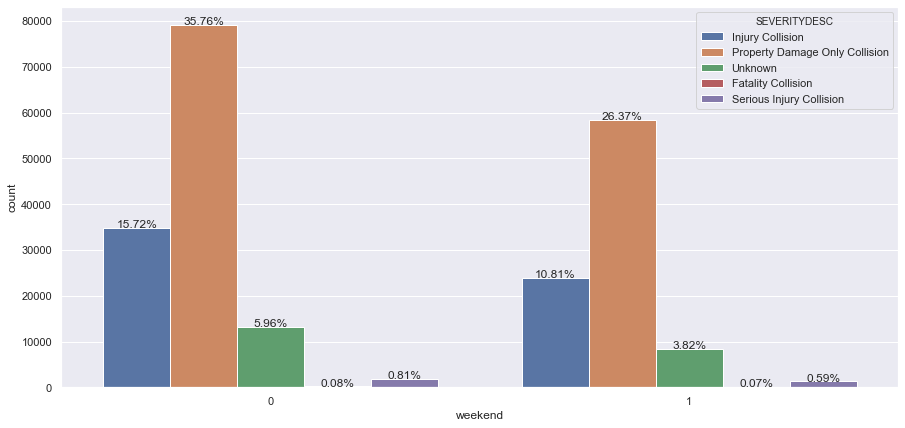

In [58]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="weekend", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


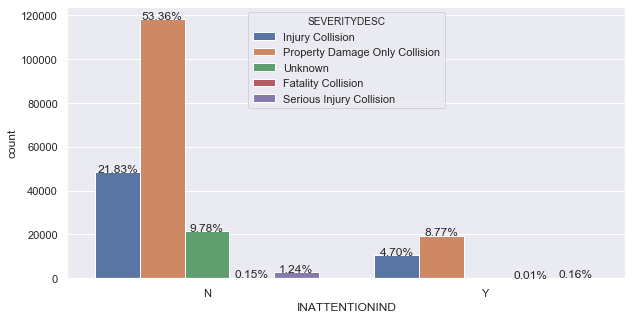

In [59]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="INATTENTIONIND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="hourofday", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


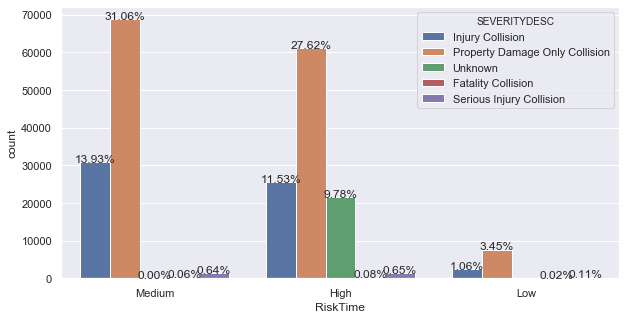

In [61]:
df['RiskTime'] = df['hourofday'].apply(lambda x: "Low" if x in (1,2,3,4) else ("Medium" if x in (5,6,7,8,9,10,11,12,13,14,15,16) else "High"))

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="RiskTime", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


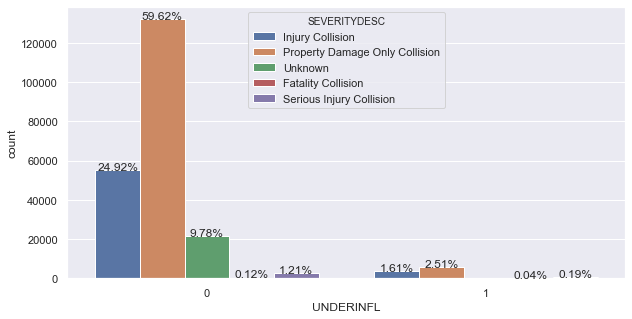

In [62]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


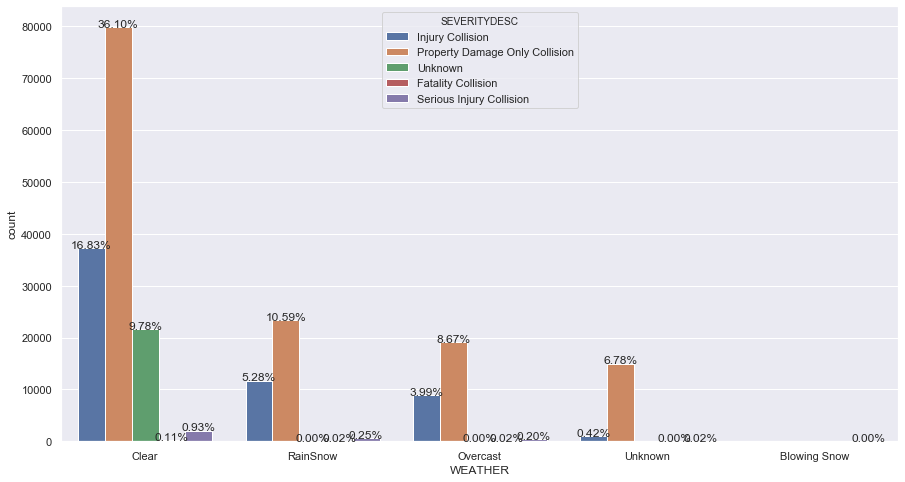

In [63]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


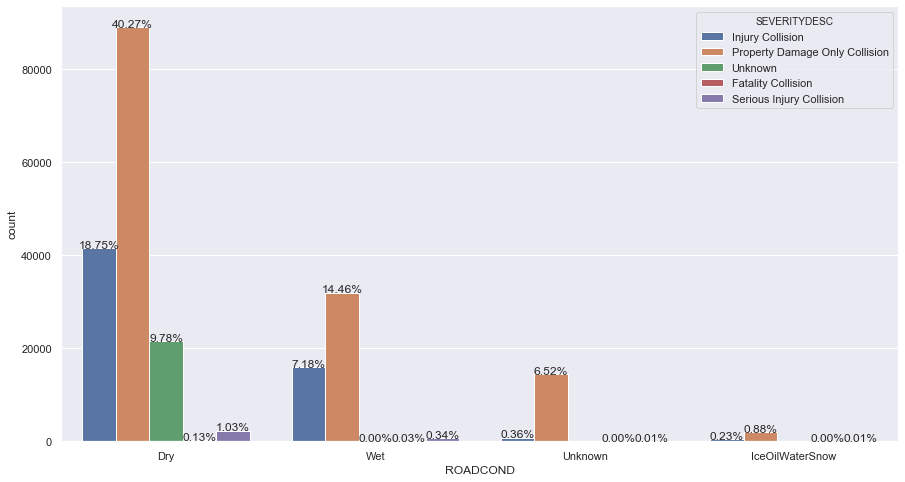

In [64]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

##### Continuous numerical variables and linear relationship

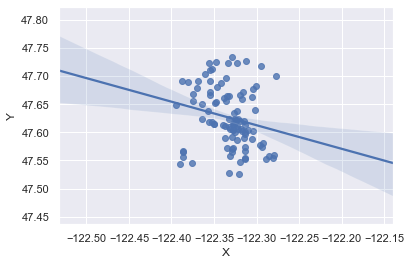

In [65]:
sns.regplot(x="X", y="Y",data=df_map.head(100), ci=80)
plt.show()

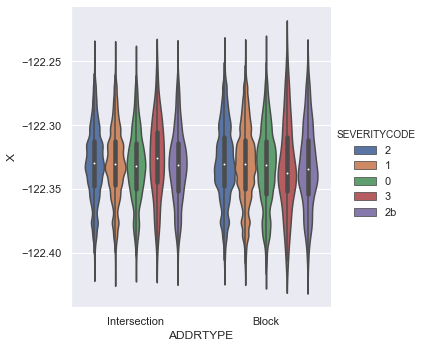

In [66]:
sns.catplot(x="ADDRTYPE", y="X", hue="SEVERITYCODE",data=df_map, kind="violin")
plt.show()

### Descriptive Statistical Analysis

In [67]:
df.describe(include=['object'])

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,RiskTime
count,221265,221266,221266,221266,221266,221266,221266,221266,221266,221266,221266
unique,5,5,3,4,2,5,4,5,2,2,3
top,1,Property Damage Only Collision,Block,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N,N,High
freq,137485,137485,148569,113567,191078,141049,154779,145942,211353,209290,109895


In [68]:
df['SEVERITYCODE'].value_counts()

1     137485
2      58698
0      21635
2b      3098
3        349
Name: SEVERITYCODE, dtype: int64

##### Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [70]:
df['ADDRTYPE'].unique() 

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [ ]:
df_gptest = df[['hourofday','ADDRTYPE','SEVERITYCODE']]
grouped_test1 = df_gptest.groupby(['hourofday','ADDRTYPE'],as_index=False).mean()
grouped_test1

In [ ]:
grouped_pivot = grouped_test1.pivot(index='ADDRTYPE',columns='hourofday')
grouped_pivot

##### Correlation and Causation

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

##### ANOVA: Analysis of Variance

test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

### Map - Heatmap and other Map with number

In [73]:
df_map["geom"] = df_map["Y"].map(str) + "," + df_map["X"].map(str)
df_map.head()

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,AddType-Block,AddType-Intersection,geom
0,2,Intersection,-122.386772,47.564720,Low,0,1,"47.5647203004631,-122.38677160689501"
1,2,Intersection,-122.341806,47.686934,Medium,0,1,"47.6869337771846,-122.34180599725599"
2,1,Block,-122.374899,47.668666,Low,1,0,"47.668666144477704,-122.374899462775"
3,1,Intersection,-122.300758,47.683047,Medium,0,1,"47.6830474274607,-122.300758228115"
4,0,Block,-122.313053,47.567241,Medium,1,0,"47.5672405221464,-122.313053234523"


In [ ]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

# using X Y data to search for a complete address
locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)
# show the progress by percentange of searching results
tqdm_notebook.pandas()
df_map["address"] = df_map["geom"].progress_apply(rgeocode)
df_map.head(5)

In [ ]:
df_map["address"][0].raw

In [ ]:
df_map["address"][0].raw['address']['neighbourhood']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Create basic Folium Seattle map
injury_map = folium.Map(location=[47.61536892, -122.3302243], 
                       tiles = "OpenStreetMap",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df_map[df_map['SEVERITYCODE']==2]
data_heatmap = df_map[['Y','X']]
data_heatmap = df_map.dropna(axis=0, subset=['Y','X'])
data_heatmap = [[row['Y'],row['X']] for index, row in data_heatmap.head(10000).iterrows()] 
# why 5000? Data too large to process.
HeatMap(data_heatmap, radius=10).add_to(injury_map)

# Plot!
injury_map

In [ ]:
import folium
from folium import plugins

# only show the injury record, not property collision
df_map_injury = df_map[df_map['SEVERITYCODE']==2]
# Make reduced df by selecting every 50th record
reduced_df = df_map_injury.iloc [0::20, 0:]

# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
#seattle_map.save("seattlemap.html")
#webbrowser.open("seattlemap.html")

## Model Pre-processing: Feature selection/extraction

In [78]:
df.columns

Index(['SEVERITYCODE', 'SEVERITYDESC', 'ADDRTYPE', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR', 'hourofday', 'dayofweek',
       'weekend', 'RiskTime'],
      dtype='object')

In [79]:
df.isnull().any()

SEVERITYCODE       True
SEVERITYDESC      False
ADDRTYPE          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE      False
INATTENTIONIND    False
UNDERINFL         False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING          False
HITPARKEDCAR      False
hourofday         False
dayofweek         False
weekend           False
RiskTime          False
dtype: bool

In [80]:
y = df["SEVERITYCODE"]

### Feature selection

In [81]:
Feature = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]
X = Feature.values
X[0:5]

array([['Intersection', 'At-Intersection', 'N', 0, 'Clear', 'Dry',
        'Daylight', 'N', 'Medium', 0],
       ['Intersection', 'At-Intersection', 'N', 0, 'RainSnow', 'Wet',
        'Dark-With-Light', 'N', 'High', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Clear', 'Dry', 'Daylight', 'N', 'Medium', 0],
       ['Intersection', 'At-Intersection', 'N', 0, 'RainSnow', 'Wet',
        'Dark-With-Light', 'N', 'High', 0],
       ['Block', 'Mid-Block (but intersection related)', 'N', 0, 'Clear',
        'Dry', 'Daylight', 'N', 'High', 1]], dtype=object)

In [82]:
df['weekend'].value_counts()

0    129072
1     92194
Name: weekend, dtype: int64

### Convert Categorical features to numerical values

In this case, using LabelEncoder only is not a good choice, since it brings in a natural ordering for different classes. For example, under ‘Neighborhood’ feature, class_a has value 5 but class_b has value 24, is class_b ‘greater’ than class_a? The answer is obviously no. Thus allowing model learning this result will lead to poor performance. Therefore, for dataframe containing multi class features, a further step of OneHotEncoder is needed.

In [83]:
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

ADDRTYPE           True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
RiskTime           True
weekend           False
dtype: bool

In [84]:
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

['ADDRTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING',
 'RiskTime']

In [85]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [86]:
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime
0,2,0,0,1,0,2,0,2
1,2,0,0,3,3,1,0,0
2,1,2,0,1,0,2,0,2
3,2,0,0,3,3,1,0,0
4,1,1,0,1,0,2,0,0
5,1,3,0,1,0,2,0,0
6,1,2,0,1,0,1,0,1
7,2,0,0,1,0,2,0,2
8,1,2,0,1,0,1,0,0
9,1,1,1,1,0,2,0,2


In [87]:
X = Feature.values
X[0:5]

array([[2, 0, 0, 0, 1, 0, 2, 0, 2, 0],
       [2, 0, 0, 0, 3, 3, 1, 0, 0, 0],
       [1, 2, 0, 0, 1, 0, 2, 0, 2, 0],
       [2, 0, 0, 0, 3, 3, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 2, 0, 0, 1]], dtype=int64)

### One-Hot-Encoder or Get_Dummies to avoid over-weigh problems

In [88]:
print(Feature.shape)
dummy_Feature = pd.get_dummies(Feature)
# dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
print("----After Dummy Fuction------")
print(dummy_Feature.shape)
dummy_Feature.head(5)

(221266, 10)
----After Dummy Fuction------
(221266, 10)


,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime,weekend
0,2,0,0,0,1,0,2,0,2,0
1,2,0,0,0,3,3,1,0,0,0
2,1,2,0,0,1,0,2,0,2,0
3,2,0,0,0,3,3,1,0,0,0
4,1,1,0,0,1,0,2,0,0,1


In [89]:
X = dummy_Feature.values

### Model

In [96]:
from sklearn.model_selection import train_test_split
#Test/Train split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132759, 10) (132759,)
Test set: (88507, 10) (88507,)


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE (random_state=0)
X_train, y_train = os.fit_sample(X_train_raw, y_train_raw)
print ('Train set:', X_train.shape,  y_train.shape)

In [ ]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

### Classification

### K Nearest Neighbor(KNN)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Find the best K between 1 an 10
grid_params = {'n_neighbors': [i for i in range(1, 10)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)

In [ ]:
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)

In [ ]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with:", grid_results.best_score_.round(2))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat_train = neigh.predict(X_train)

In [ ]:
print("KNN Accuracy     : {:.2f}".format(metrics.accuracy_score(y_train, yhat_train)))
print("KNN Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train)))
print("KNN F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train, average='weighted')))

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train))
print(classification_report(y_train, yhat_train))

plot_confusion_matrix(neigh, X_train, y_train, include_values=True)
plt.show()

In [ ]:
yhat_test = neigh.predict(X_test)

print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

plot_confusion_matrix(neigh, X_test, y_test, include_values=True)
plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = neigh.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.image as mpimg

# Find the best para
tree_grid_params = {'criterion': ['entropy'], 'max_depth': [i for i in range(3,30)]}
tree_grid = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid_params, cv = 3)
tree_grid_results = tree_grid.fit(X_train, y_train)

#plot the result of finding best para
sns.set_style("whitegrid")
sns.lineplot(tree_grid_params['max_depth'], tree_grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)
print("The best tree_depth was: ",tree_grid_results.best_params_["max_depth"])
print("The best accuracy was  : ",tree_grid_results.best_score_)

In [ ]:
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_grid_results.best_params_.get('max_depth'))
carTree.fit(X_train,y_train)
y_predTree = carTree.predict(X_train)

In [ ]:
print("loanTree Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, y_predTree)))
print("loanTree F1-score     : {:.2f}".format(metrics.f1_score(y_train, y_predTree, average='weighted')))

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_predTree))
print(classification_report(y_train, y_predTree))

plot_confusion_matrix(carTree, X_train, y_train, include_values=True)
plt.show()

In [ ]:
y_test_predTree = carTree.predict(X_test)
print(confusion_matrix(y_test, y_test_predTree))
print(classification_report(y_test, y_test_predTree))

In [ ]:
plot_confusion_matrix(carTree, X_test, y_test, include_values=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]

from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(carTree, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()
plt.savefig('filename.png')

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# find the best para
grid_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
LR_grid = GridSearchCV(LogisticRegression(),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

print("The best parameter was: ",LR_grid.best_params_) # {'C': 0.001, 'penalty': 'l2'}
print("The best accuracy was : ",LR_grid.best_score_)

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear',penalty='l2').fit(X,y)
yhat_train_LR = LR.predict(X_train)
yhat_train_LR_prob = LR.predict_proba(X_train)

In [ ]:
print("LR Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train_LR)))
print("LR F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train_LR, average='weighted')))
print("LR Log Loss     : {:.2f}".format(metrics.log_loss(y_train, yhat_train_LR_prob)))

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train_LR))
print(classification_report(y_train, yhat_train_LR))

plot_confusion_matrix(LR, X_train, y_train, include_values=True)
plt.show()

In [ ]:
yhat_test_LR = LR.predict(X_test)

print(confusion_matrix(y_test, yhat_test_LR))
print(classification_report(y_test, yhat_test_LR))

plot_confusion_matrix(LR, X_test, y_test, include_values=True)
plt.show()